# Muestreo e interpolación

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## La distribución shah

Recordemos que [hemos definido la distribución shah](./07-Impulso.ipynb#shah) de la siguiente forma:
\begin{equation}
{\bot \!\! \bot \!\! \bot} = \sum_{n=-\infty}^{\infty} \mathbf{\delta_{n}}
\end{equation}

tal que:
\begin{equation}
\langle {\bot \!\! \bot \!\! \bot}, \varphi \rangle =  \sum_{n=-\infty}^{\infty} \varphi(n)  \;\;\;\; \forall \; \varphi \in  S(\mathbb{R};\mathbb{C})
\end{equation}

Esta distribución consiste de una suma infinita de impulsos todos situados a distancia 1 de sus vecinos, lo que implica que están igualmente espaciados. Cuando es deseable distribuir los impulsos con una separación distinta $T$, usualmente se considera la siguiente definición:

\begin{equation}
{\bot \!\! \bot \!\! \bot}_T = \sum_{n=-\infty}^{\infty} \mathbf{\delta_{nT}}
\end{equation}

tal que:
\begin{equation}
\langle {\bot \!\! \bot \!\! \bot}_T, \varphi \rangle =  \sum_{n=-\infty}^{\infty} \varphi(n-T)  \;\;\;\; \forall \; \varphi \in  S(\mathbb{R};\mathbb{C})
\end{equation}

Ambas versiones de la distribución shah son comúnmente utilizadas en el análisis de señales, por lo que es importante determinar la relación entre ambas.

Recordando la [propiedad de escalamiento del impulso](./07-Impulso.ipynb#escalamiento) tenemos que

$$\partial_T  \mathbf{ (\delta)} = \frac{1}{|T|}\mathbf{\delta} $$

Aplicando esta propiedad a la distribución shah, tenemos:

\begin{equation}
\partial_T{\bot \!\! \bot \!\! \bot} = \partial_T\sum_{n=-\infty}^{\infty} \mathbf{\delta_{n}} = \sum_{n=-\infty}^{\infty} \partial_T \mathbf{\delta_{n}} =  \sum_{n=-\infty}^{\infty} \frac{1}{|T|} \mathbf{\delta_{\frac{n}{T}}} =  \frac{1}{|T|} {\bot \!\! \bot \!\! \bot}_\frac{1}{T}
\end{equation}

es decir

\begin{equation}
\partial_T{\bot \!\! \bot \!\! \bot} = \frac{1}{|T|} {\bot \!\! \bot \!\! \bot}_\frac{1}{T}
\end{equation}

o equivalentemente

\begin{equation}
{\bot \!\! \bot \!\! \bot}_T = \frac{1}{|T|} \partial_{\frac{1}{T}}{\bot \!\! \bot \!\! \bot}
\end{equation}


Recordemos además cuales son las Transformadas de Fourier directa e inversa de esta distribución

$$\mathcal{F}\{{\bot \!\! \bot \!\! \bot}_T\} = \frac{1}{T}{\bot \!\! \bot \!\! \bot}_{\frac{1}{T}} $$

y

$$\mathcal{F^{-1}}\{{\bot \!\! \bot \!\! \bot}_T\} = \frac{1}{T}{\bot \!\! \bot \!\! \bot}_{\frac{1}{T}} $$


***
## Periodización mediante la convolución con una distribución shah

En muchos casos es de interés convertir una señal aperiódica en una periódica, por ejemplo para expresarla como una Serie de Fourier. Esta periodización se puede realizar mediante una convolución con la distribución shah. Consideremos una distribución periódica $\mathbf{\tilde{f_p}}$, resultante de la convolución de una función continua $f$ por la distribución ${\bot \!\! \bot \!\! \bot}_T$. Esta se puede escribir de la siguiente forma:

\begin{equation}
\mathbf{\tilde{f_p}} = f \ast {\bot \!\! \bot \!\! \bot}_T = \sum_{n=-\infty}^{\infty}  f \ast \mathbf{\delta_{nT}} = \sum_{n=-\infty}^{\infty}  f(t-nT)
\end{equation}

Observamos que hemos convertido una función aperiódica en una función periódica de período $T$. Obviamente, esta operación no desplaza réplicas de la función original y las pone una al lado de la otra, sino que las suma. Esto implica que si la función $f$ tiene un soporte más ancho que $T$, parte de la función se sumará a todas las réplicas generadas, por lo que los períodos de $\mathbf{\tilde{f_p}}$ no coincidirán con el valor de $f$ en el intervalo $[-\frac{T}{2},\frac{T}{2}]$. Este fenómeno se conoce como *aliasión* o [aliasing](https://en.wikipedia.org/wiki/Aliasing), en inglés.

<a name="muestreo"></a>
***
## Muestreo mediante la multiplicación por una distribución shah

Muestrear (sampling en inglés), consiste en tomar un número finito de "muestras" de una función continua, con el objetivo de convertirla en una función discreta, lo que implica que la función continua se representa mediante una secuencia de números, donde cada número indica la amplitud de la señal en algún instante del tiempo o espacio determinados. Para poder saber en qué momento o lugar se tomó una muestra en particular es importante que el muestreo sea hecho a intervalos regulares. De otra forma habría que almacenar dos secuencias, una con las amplitudes y otra con los tiempos de muestreo.

El muestreo se puede realizar mediante una sencilla operación con la distribución shah. Consideremos una distribución $\mathbf{f_d}$, resultante de la multiplicación de una función continua $f$ por la distribución ${\bot \!\! \bot \!\! \bot}_T$, que sabemos que consiste de impulsos espaciados a intervalos $T$. Esta se puede escribir de la siguiente forma:

\begin{equation}
\mathbf{f_d} = f  {\bot \!\! \bot \!\! \bot}_T = \sum_{n=-\infty}^{\infty}  f \mathbf{\delta_{nT}} = \sum_{n=-\infty}^{\infty}  f(nT) \mathbf{\delta_{nT}}
\end{equation}

Observamos que hemos convertido una función continua en una suma de valores o muestras de la función original evaluadas en los puntos $nT$. La propiedad de multiplicación por un impulso nos permite acceder al valor de la función en el lugar donde está el impulso. 

Esto se puede representar gráficamente mediante la siguiente figura:
<img width="400" src="./images/Muestreo.png">

### Muestreo visto en el dominio de Fourier
Veamos que sucede con esta operación en el dominio de Fourier. Si $\left\{f(na)\right\}_{n \in \mathbb{Z}}$ es acotada, entonces $\mathbf{f_d}$ es una distribución temperada y su Transformada de Fourier está bien definida. Se obtiene:

$$\mathcal{F}\left\{\mathbf{f_d} \right\} = \mathcal{F}\{ f\} \ast \mathcal{F}\left\{ \mathbf{{\bot \!\! \bot \!\! \bot}_T } \right\}$$

por lo que:

$$\mathcal{F}\left\{\mathbf{f_d} \right\} = \mathcal{F}\{ f \} \ast \frac{1}{T}\mathbf{{\bot \!\! \bot \!\! \bot}_{\frac{1}{T}} }$$

y, como recién hemos visto, la convolución con un shah es equivalente a periodizar:

\begin{equation}
\mathcal{F}\left\{\mathbf{f_d} \right\} = \frac{1}{T}\sum_{n=-\infty}^{+\infty} \mathcal{F}\{ f\} (u-\frac{n}{T})
\end{equation}

Observamos que el muestrear una señal en el tiempo o espacio es equivalente a periodizar su Transformada de Fourier en el dominio de la frecuencia. 



***
## Interpolación

Supongamos que tenemos una secuencia de números, es decir una función discreta $f_d$, que es el resultado del muestreo de una señal continua $f$. Nos Interesa poder reconstruir la señal original $f$ mediante un operación del tipo 

$$ f(t) = \sum_{n=-\infty}^{+ \infty} f(nT) g_r(t-nT)  $$

Es decir, utilizamos una funcion de reconstrucción $g_r$ centrada en las posiciones de cada una de las muestras obtenidas de la señal original $f$. Es claro que esta operación es una convolución en $n$. Esta operación se conoce como una interpolación y la función de reconstrucción $g_r$ se conoce como el núcleo o kernel de interpolación. 

***
### Interpolación de orden cero

La interpolación más simple que se puede hacer, y que en realidad es una de las más prácticas es simplemente extender el valor de la muestra actual hasta la siguiente. Esto se conoce también como [retención de orden cero](https://en.wikipedia.org/wiki/Zero-order_hold). Es decir, el kernel de interpolación en este caso es:

$$ g_r(t) = \sqcap\left(\frac{t-\frac{T}{2}}{T}\right)$$


<img width="300" src="./images/ZOH-Kernel.png">

cuya Transformada de Fourier es 

$$ G_r(u) = T \mbox{sinc}(Tu) e^{-i 2\pi \frac{T}{2} u} = T \mbox{sinc}(Tu) e^{-i T \pi u}$$

Esto implica que esta operación de mantener el valor de la muestra hasta la siguiente multiplica el espectro de la señal por una función $\mbox{sinc}$ torcida en el dominio de la frecuencia. La reconstrucción en este caso se ejemplifica en la siguiente figura:

<img width="500" src="./images/ZOH.png">

***
### Interpolación de primer orden
Otro esquema de interpolación muy utilizado es trazar una línea recta entre los pares de muestras de una secuencia discreta. Esto se conoce también como interpolación lineal, [retención de primer orden](https://en.wikipedia.org/wiki/First-order_hold). Es decir, el kernel de interpolación en este caso es:

$$ g_r(t) = \wedge\left(\frac{t}{T}\right)$$

<img width="300" src="./images/FOH-Kernel.png">


cuya Transformada de Fourier es 

$$ G_r(u) = T \mbox{sinc}^2(Tu)$$

Esto implica que esta operación de mantener el valor de la muestra hasta la siguiente multiplica el espectro de la señal por una función $\mbox{sinc}$ al cuadrado.

<img width="500" src="./images/FOH.png">


***
### Interpolación sinc
Como veremos, el utilizar un kernel de interpolación de la forma

$$ g_r(t) = \mbox{sinc}\left(\frac{t}{T}\right) $$

Implica multiplicar en frecuencia por

$$ G_r(u) = T\sqcap(Tu) $$

lo que corresponde a una reconstrucción ideal, ya que se logra recuperar el espectro de la señal original de forma intacta en el intervalo de muestreo. Gráficamente, esta interpolación se representa de la siguiente manera:


<img width="600" src="./images/InterpolacionSinc.png">

Observamos que cada muestra se convoluciona con un $\mbox{sinc}$ desplazado y de altura equivalente al valor de función reconstruida en cada instante de muestreo. Los cruces por cero del $\mbox{sinc}$ ocurren en las posiciones de muestreo, lo que implica que el valor de la función reconstruida en los puntos de muestreo está únicamente determinada por el kernel $\mbox{sinc}$

***
<a name="teorema_del_muestreo"></a>
## Teorema del muestreo o de Nyquist
Sea $f$ una señal cuya Transformada de Fourier $\mathcal{F}\{f\}$ de ancho de banda limitado, es decir que decae a cero fuera del intervalo $[-\frac{1}{2T}, \frac{1}{2T}]$. Entonces $f$ se puede reconstruir en forma exacta a partir de una interpolación de sus muestras, adquiridas con un período de muestreo $T$:

$$ f(t) = \sum_{n=-\infty}^{+ \infty} f_d[n]g(t-nT)  = \sum_{n=-\infty}^{+ \infty} f(nT) g(t-nT)  $$

con el kernel de interpolación

$$ g(t)= \mbox{sinc}\left ( \frac{t}{T}  \right) = \mbox{sinc}\left ( u_s t  \right) $$

La cantidad $u_s = \frac{1}{T}$ se conoce como la *frecuencia de muestreo*.

### Demostración
<div class="alert alert-block alert-info">
Como por definición $\mathcal{F}\{f\}$ es de ancho de banda limitado, con un ancho en frecuencia de $1/T$, podemos periodizarla convolucionando por $\mathbf{{\bot \!\! \bot \!\! \bot}_{\frac{1}{T}}}$ y recuperarla multiplicando por un rect de ancho $1/T$, es decir

$$ \mathcal{F}\{f\} = \sqcap_{\frac{1}{T}} ( \mathcal{F}\{f\} \ast \mathbf{{\bot \!\! \bot \!\! \bot}_{\frac{1}{T}}}) $$

Tomando la inversa:

$$ f(t) = \mathcal{F^{-1}}\{f(t)\} = \mathcal{F^{-1}}\{ \sqcap_{\frac{1}{T}} ( \mathcal{F}\{f\} \ast \mathbf{{\bot \!\! \bot \!\! \bot}_{\frac{1}{T}}}) \}(t) $$


Como la inversa intercambia convolución por multiplicación tenemos:

$$ f(t) = \mathcal{F^{-1}}\{ \sqcap_{\frac{1}{T}}\}(t) \ast \mathcal{F^{-1}}\{ \mathcal{F}\{f\} \ast \mathbf{{\bot \!\! \bot \!\! \bot}_{\frac{1}{T}}} \}(t) $$

y ahora cambiando convolución por multiplicación:

$$ f(t) = \mathcal{F^{-1}}\{ \sqcap_{\frac{1}{T}}\}(t) \ast \mathcal{F^{-1}}\{ \mathcal{F}\{f\} \} \mathcal{F^{-1}}\{\mathbf{{\bot \!\! \bot \!\! \bot}_{\frac{1}{T}}} \}(t) $$

es decir:

$$ f(t) = \frac{1}{T}\mbox{sinc}\left(\frac{t}{T}\right) \ast \left(f \hspace{.2cm} T\mathbf{{\bot \!\! \bot \!\! \bot}_T} (t) \right) = \mbox{sinc}\left(\frac{t}{T}\right) \ast \sum_{n=-\infty}^{\infty} f(nT) \delta_{nT} $$

o lo que es lo mismo:

$$ f(t) = \sum_{n=-\infty}^{\infty} \mbox{sinc}\left( \frac{t}{T}\right) \ast f(nT) \delta_{nT} = \sum_{n=-\infty}^{\infty} f(nT) \mbox{sinc}\left( \frac{t}{T}\right) \ast \delta_{nT} = \sum_{n=-\infty}^{\infty} f(nT) \mbox{sinc}\left( \frac{t-nT}{T} \right)$$
</div>

<font color="red">La condición necesaria para poder reconstriur una señal continua a partir de sus muestras es que la frecuencia máxima de $F(u)$ sea menor o igual la mitad de la frecuencia de muestreo $u_s$.</font>

## Muestreo crítico, sobremuestreo y submuestreo (aliasión)

En el análisis anterior pusimos la restricción que $F(u)$ fuera de ancho de banda limitada, es decir que a partir de una frecuencia máxima $u_m$, $F(u) = 0$. Y analizamos el caso específico en que $|u_m| = \frac{1}{2T}$.

<img width="800" src="./images/Muestreo_Fourier.png">


Tal como vemos en la figura, hay tres condiciones posibles dependiendo de como se escoja el período de muestreo $T$ con respecto a la frecuencia máxima $u_m$. La cantidad $2u_m$ se conoce como la [frecuencia de Nyqust](https://en.wikipedia.org/wiki/Nyquist_frequency), $T$ es el período de muestreo y $\frac{1}{T}$ es la frecuencia de muestreo.

- En el primer caso, tenemos el muestreo crítico, donde 

$$u_m = \frac{1}{2T}$$

En este caso, se puede reconstruir la señal en forma exacta al multiplicar por $\sqcap(Tu)$ en frecuencia, graficado en color verde.

- En el segundo caso, tenemos sobremuestreo, es decir

$$ u_m < \frac{1}{2T}$$

o bien 

$$  \frac{1}{T} > 2u_m  $$

Es claro que en este caso se cumple de sobra el Teorema del muestreo, dado que no hay traslape de las réplicas del espectro original. El sobremuestreo implica que se han adquirido más muestras que las necesarias para reconstruir la señal continua a partir de sus muestras.

- En el tercer caso, tenemos submuestreo, es decir

$$ u_m > \frac{1}{2T}$$

o bien 

$$  \frac{1}{T} < 2u_m  $$

Es claro que en este caso se no cumple el Teorema del muestreo, dado que hay traslape de las réplicas del espectro original. A partir del filtro de reconstrucción $\sqcap(Tu)$ no es posible reconstruir la señal original sin error. El error cometido se denomina error de *aliasión* o [aliasing](https://en.wikipedia.org/wiki/Aliasing), en inglés. El submuestreo implica que se han adquirido menos muestras que las necesarias para reconstruir la señal continua a partir de sus muestras.

***
## Ejemplo: reconstrucción de una sinuosoide

En el siguiente código generaremos una señal continua y luego la reconstruiremos mediante la convolución con un kernel sinc para tres casos distintos de la frecuencia de muestreo.

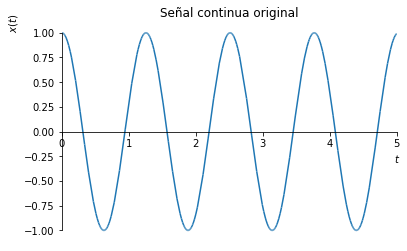

In [140]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

t = sym.symbols('t', real=True)
k = sym.symbols('k', integer=True)


def ideal_sampling(x, k, w_s):
    kappa = sym.symbols('kappa')
    xs = sym.lambdify(kappa, x.subs(t, kappa * 2 * sym.pi / w_s))
    return [xs(kappa) for kappa in k]


def ideal_reconstruction(xs, k, w_s):
    T = 2*sym.pi/w_s
    return sum(xs[n] * sym.sinc(sym.pi / T * (t - k[n] * T)) for n in range(len(k)))


def plot_signals(xs, y, w_s, k, x):

    plt.stem(k*2*np.pi/w_s, xs)
    plt.xlabel('$t$ in s')
    plt.ylabel('$x_s[k] = x_s(kT)$')
    plt.axis([0, 5, -1.2, 1.2])
    plt.title("Señal discreta")
    
    sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$', ylim=(-1.2, 1.2),title='Señal reconstruida')
    sym.plot(x, (t, 0, 5), xlabel=r'$t$', ylabel=r'$y(t)-x(t)$',title='Señal original')
    

    
w_0 = 5
x = sym.cos(w_0 * t)

sym.plot(x, (t, 0, 5), xlabel=r'$t$', ylabel=r'$x(t)$',title='Señal continua original')

plt.show()

### Sobremuestreo

Veamos el caso en que la señal original está sobremuestreada

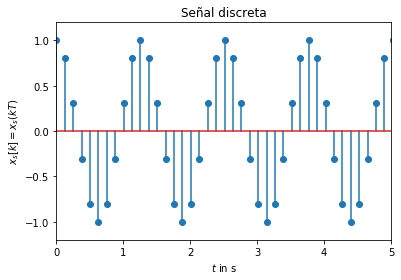

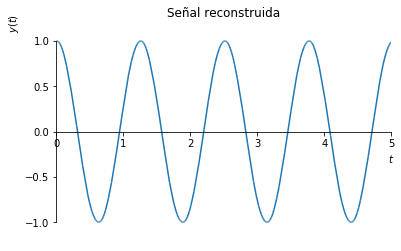

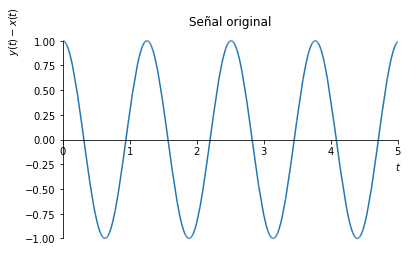

In [141]:
k = np.arange(-100, 100)

w_s = 50
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k, x)

### Muestreo crítico

En el caso del muestreo crítico solo se obtienen dos muestras por período

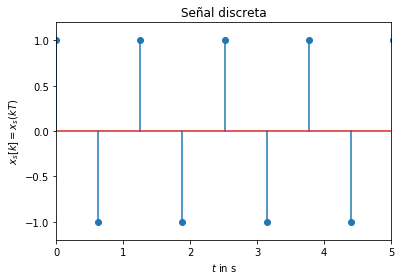

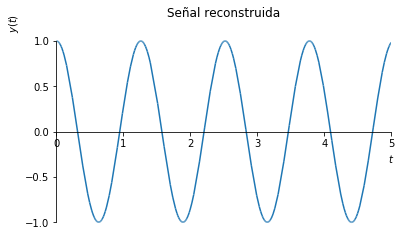

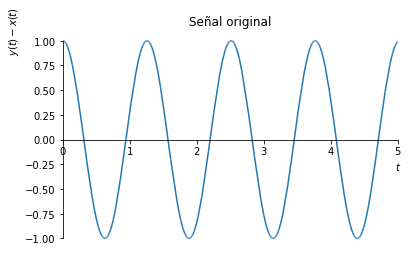

In [142]:
w_s = 10
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k, x)

### Submuestreo

En el caso del submuestreo, observamos que la señal original no logra ser reconstruida. Las frecuencias por sobre la frecuencia de muestreo se traslapan hacia el intervalo $[0,\omega_s]$. Esto se conoce como aliasión.

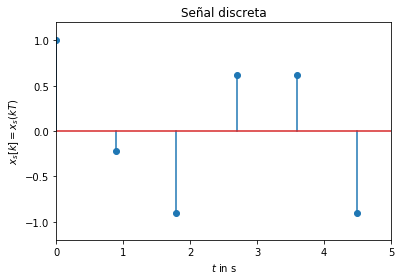

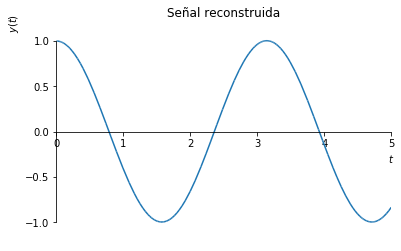

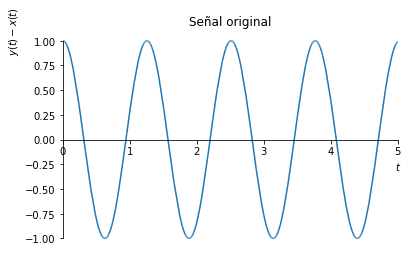

In [143]:
w_s = 7
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k, x)

***
## Cuantización y las señales digitales

Hasta ahora sólo hemos discutido el proceso de tomar muestras de una señal continua, lo que da por resultado una señal discreta. Pero en un computador, las señales con las cuales se puede trabajar, además de constar con un número finito de muestras, tienen limitaciones para las amplitudes, dependiendo del número de bits con que el computador pueda almacenar valores.

En general, si se tienen variables de $n$ bits, entonces la cantidad de valores distintos que éstas pueden tomar está dado por:

$$ 2^n $$

Por ejemplo, en el estándar de audio digital se utilizan 16 bits. Esto implica que las amplitudes de la señal digitalizada sólo puede tomar $2^{16} = 65.536$ valores distintos de amplitud. No existe una resolución infinita en amplitud. La diferencia entre la señal original y la cuantizada se denomina [error de cuantización](https://en.wikipedia.org/wiki/Quantization_(signal_processing)#Quantization_error_models). El proceso por el cual una señal con una resolución infinita en amplitud se convierte en una con resolución finita se denomina [cuantización](https://en.wikipedia.org/wiki/Quantization_(signal_processing)).

El proceso de cuantización y el error se pueden observar en la siguiente imagen. Es importante notar que el error de cuantización es estructurado, esto es, depende de la señal.

<img src="./images/Cuantizacion.png">

En el siguiente ejemplo vemos como difiere una señal digital cuantizada a distintos niveles.

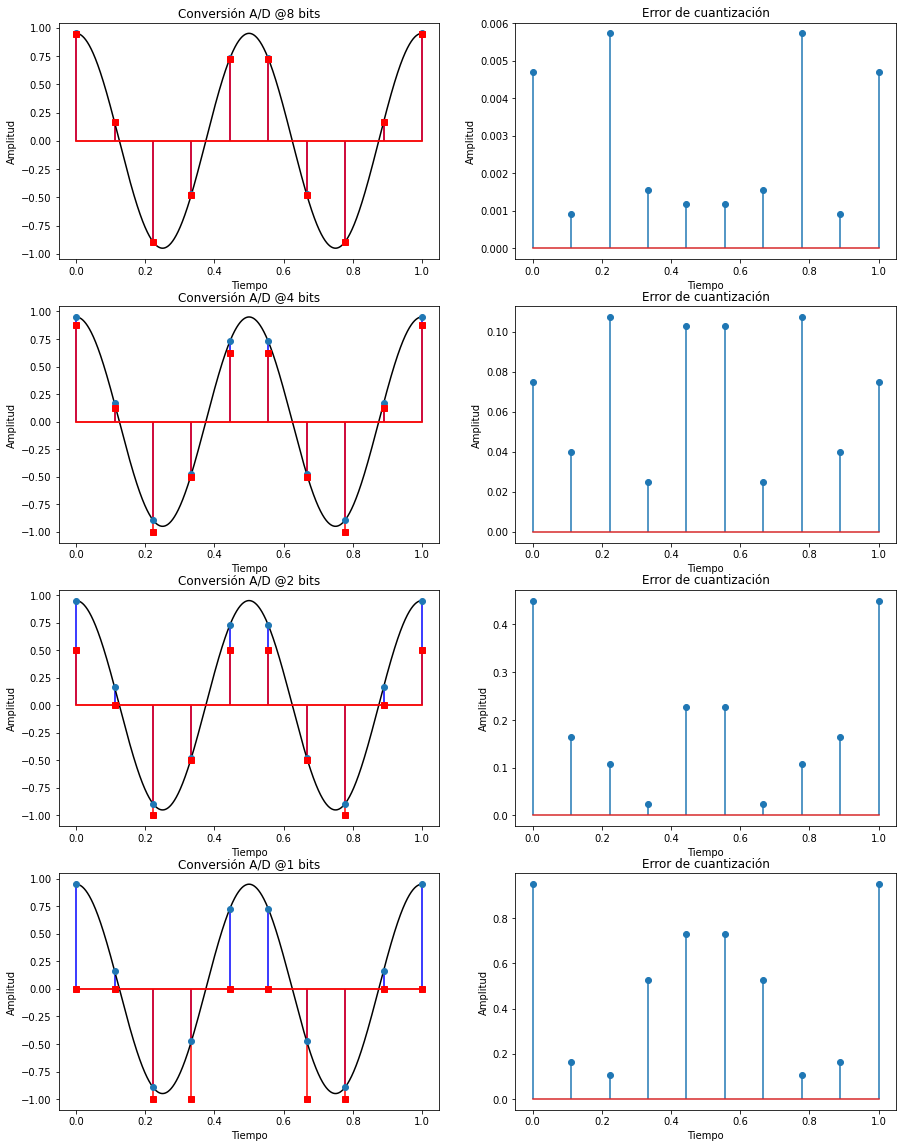

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

time_of_view        = 1.; # s.
analog_time         = np.linspace (0, time_of_view, 10000); # s.

sampling_rate       = 10.; # Hz
sampling_period     = 1. / sampling_rate; # s
sample_number       = np.int(time_of_view / sampling_period);
sampling_time       = np.linspace (0, time_of_view, sample_number);

carrier_frequency   = 2;
amplitude           = 0.95;
phase               = 0;

def analog_signal (time_point):
    return amplitude * np.cos (2 * np.pi * carrier_frequency * time_point + phase);

sampling_signal     = analog_signal(sampling_time);


# -------
quantizing_bits     = 8;
quantizing_levels   = 2 ** quantizing_bits / 2;
quantizing_step     = 1 / quantizing_levels;


quantizing_signal   = np.floor(sampling_signal / quantizing_step) * quantizing_step;


plt.figure(figsize=(15,20))


plt.subplot(4,2,1)
plt.plot (analog_time,   analog_signal (analog_time),'k-' );
plt.stem (sampling_time, sampling_signal,'b-',use_line_collection=True);
plt.stem (sampling_time, quantizing_signal, linefmt='r-', markerfmt='rs', basefmt='r-',use_line_collection=True);
plt.title("Conversión A/D @%d bits" %(quantizing_bits))
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")


plt.subplot(4,2,2)
plt.stem (sampling_time, sampling_signal-quantizing_signal,use_line_collection=True);
plt.title("Error de cuantización")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

# -------
quantizing_bits     = 4;
quantizing_levels   = 2 ** quantizing_bits / 2;
quantizing_step     = 1 / quantizing_levels;

quantizing_signal   = np.floor(sampling_signal / quantizing_step) * quantizing_step;


plt.subplot(4,2,3)
plt.plot (analog_time,   analog_signal (analog_time),'k-' );
plt.stem (sampling_time, sampling_signal,'b-',use_line_collection=True);
plt.stem (sampling_time, quantizing_signal, linefmt='r-', markerfmt='rs', basefmt='r-',use_line_collection=True);
plt.title("Conversión A/D @%d bits" %(quantizing_bits))
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")


plt.subplot(4,2,4)
plt.stem (sampling_time, sampling_signal-quantizing_signal,use_line_collection=True);
plt.title("Error de cuantización")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

# -------
quantizing_bits     = 2;
quantizing_levels   = 2 ** (quantizing_bits) /2;
quantizing_step     = 1 / quantizing_levels;

quantizing_signal   = np.floor(sampling_signal / quantizing_step) * quantizing_step;

plt.subplot(4,2,5)
plt.plot (analog_time,   analog_signal (analog_time),'k-' );
plt.stem (sampling_time, sampling_signal,'b-',use_line_collection=True);
plt.stem (sampling_time, quantizing_signal, linefmt='r-', markerfmt='rs', basefmt='r-',use_line_collection=True);
plt.title("Conversión A/D @%d bits" %(quantizing_bits))
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")


plt.subplot(4,2,6)
plt.stem (sampling_time, sampling_signal-quantizing_signal,use_line_collection=True);
plt.title("Error de cuantización")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

# -------
quantizing_bits     = 1;
quantizing_levels   = 2 ** (quantizing_bits) /2;
quantizing_step     = 1 / quantizing_levels;

quantizing_signal   = np.floor(sampling_signal / quantizing_step) * quantizing_step;

plt.subplot(4,2,7)
plt.plot (analog_time,   analog_signal (analog_time),'k-' );
plt.stem (sampling_time, sampling_signal,'b-',use_line_collection=True);
plt.stem (sampling_time, quantizing_signal, linefmt='r-', markerfmt='rs', basefmt='r-',use_line_collection=True);
plt.title("Conversión A/D @%d bits" %(quantizing_bits))
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")


plt.subplot(4,2,8)
plt.stem (sampling_time, sampling_signal-quantizing_signal,use_line_collection=True);
plt.title("Error de cuantización")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.show()

***
## Señales de duración limitada vs de ancho de banda limitado

En el mundo real, las señales no son infinitas, sino que tienen una cierta duración. Por otro lado, las señales de ancho de banda limitado son de interés práctico, por ejemplo que no tengan contenido de frecuencias sobre un cierto valor. Por ejemplo, las señales de audio de frecuencias mayores a 20.000 Hz no son audibles para la mayoría de los seres humanos.

Lamentablemente no es posible tener una señal que cumpla con ambos criterios, al menos en el mundo de las matemáticas. <font color="red">Una señal no puede ser de duración limitada y de ancho de banda limitado al mismo tiempo</font>. Lo que implica, en la práctica que cualquier análisis realizado sobre una señal de ancho de banda limitado con una duración finita, debe necesariamente tener imprecisiones matemáticas.

***
## $\mbox{Sinc}$ como identidad de convolución

Así como la distribución Delta de Dirac es el elemento identidad de la convolución:

$$ f \ast \delta = f$$

para el caso de señales de ancho de banda limitado, la función $\mbox{sinc}$ también es un elemento identidad de la convolución, es decir

$$ f(t) \ast a \hspace{.1cm}\mbox{sinc}(at) = f(t) $$

esto se cumple en el caso que la señal $f(t)$ tenga una Transformada de Fourier de ancho de banda limitado entre $-a/2$ y $a/2$.

<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>